In [1]:
from utils.scores import BICScore
import pandas as pd
from localSearch import SteepestAscent

In [2]:
data = pd.read_csv('data/titanic.csv')
data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)

data['Sex'] = data['Sex'].apply(lambda x: 1 if x=='male' else 0)

data.dropna(inplace=True)

Not able to perform a tried movement; retrying with another.
Not able to perform a tried movement; retrying with another.
Not able to perform a tried movement; retrying with another.
Not able to perform a tried movement; retrying with another.
Not able to perform a tried movement; retrying with another.
Not able to perform a tried movement; retrying with another.
Not able to perform a tried movement; retrying with another.
Not able to perform a tried movement; retrying with another.
Not able to perform a tried movement; retrying with another.
Not able to perform a tried movement; retrying with another.
Not able to perform a tried movement; retrying with another.
Not able to perform a tried movement; retrying with another.
Not able to perform a tried movement; retrying with another.
Not able to perform a tried movement; retrying with another.
Not able to perform a tried movement; retrying with another.
Not able to perform a tried movement; retrying with another.
Not able to perform a tr

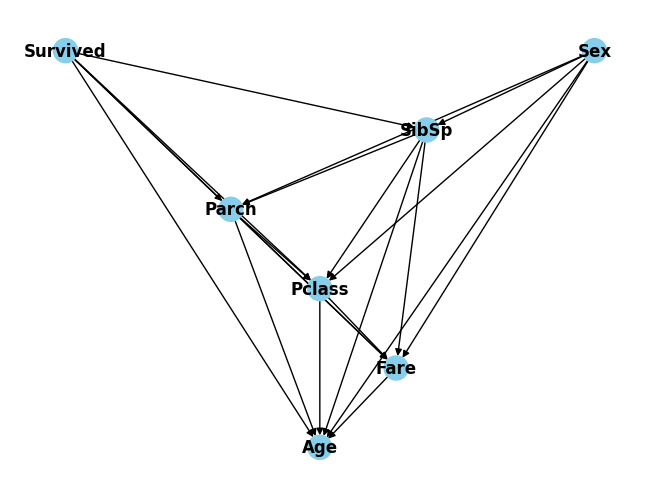

In [3]:
learner = SteepestAscent(data, score=BICScore, maxIterations=100, neighbourhoodSize=100)
learner.learn()
print('Obtained BIC Score:', learner.score.getScore(learner.graph))
learner.graph.plot()

In [4]:
from PC import PCSimple
pc = PCSimple()
pcGraph, _ = pc.causalDiscovery(data)

Depth 0 completed
Depth 1 completed


In [5]:
from utils.graph import DGraph
pcGraph = DGraph(adjacencyDict=pcGraph)

print('PC Algorithm BIC Score:', BICScore(data).getScore(pcGraph))

PC Algorithm BIC Score: -15962414.249808647


In [6]:
from pgmpy.estimators import PC

libraryPCGraph = PC(data).estimate(return_type='dag', significance_level=0.5)

  0%|          | 0/5 [00:00<?, ?it/s]

In [7]:
libraryPCDGraph = DGraph(edges=list(libraryPCGraph.edges()))
print('Library PC Algorithm BIC Score:', BICScore(data).getScore(libraryPCDGraph))

Library PC Algorithm BIC Score: -19720.89874571018


In [8]:
print(libraryPCDGraph)

[('Pclass', 'Age'), ('Survived', 'Age'), ('Fare', 'Parch'), ('Fare', 'Pclass'), ('Fare', 'SibSp'), ('Sex', 'Fare')]
